# Proyecto semana 4

Este proyecto esta basado en el proyecto Assigment 2 del curso applied data science with python de la universidad de michigan.

En este proyecto trabajara con el archivo newdata.csv referente a las lineas de metro de michigan en estados unidos.

Los datos para esta tarea provienen de un subconjunto de la Red de Climatología Histórica Global Diaria de los Centros Nacionales de Información Ambiental (NCEI)[Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). El GHCN-Daily se compone de registros climáticos diarios de miles de estaciones terrestres en todo el mundo.
Cada fila es una observacion individual.

Se manejaran las siguientes variables:

* **id** : codigo de la estacion
* **date** : fecha en el formato YYYY-MM-DD (ejmplo: 2012-01-24 = Enero 24, 2012)
* **element** : tipo de elemento
    * TMAX : Temperatura maxima (decenas de grados C)
    * TMIN : Temperatura minima (decenas de grados C)
* **value** : dato del valor de cada elemento (decenas de grados C)

Para esta tarea, debe:

Lea la documentación y familiarícese con el conjunto de datos, luego escriba un código de Python que devuelva un gráfico lineal del récord de temperaturas máximas y mínimas registradas por día del año durante el período 2005-2014. El área entre las temperaturas máximas y mínimas récord de cada día debe estar sombreada.

**Opcional:**
Superponga una dispersión de los datos de 2015 para cualquier punto (máximos y mínimos) para los que se batió el récord de diez años (2005-2014) récord máximo o mínimo histórico en 2015.
Tenga cuidado con los días bisiestos (es decir, el 29 de febrero), es razonable eliminar estos puntos del conjunto de datos para esta visualización.

No olvide agregar leyendas, titulos y eliminar la basura.

Deberia verse como la siguiente grafica:
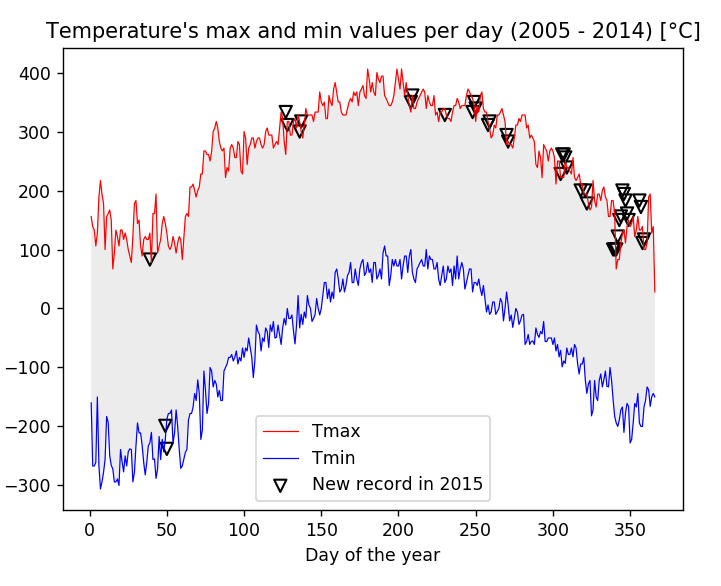

In [39]:
%matplotlib notebook

import matplotlib.pyplot as plt

In [40]:
plt.subplots?

In [41]:
import pandas as pd
df = pd.read_csv('newdata.csv')
df.head()

,Unnamed: 0,ID,Date,Element,Data_Value
0,0,USW00094889,2014-11-12,TMAX,22
1,1,USC00208972,2009-04-29,TMIN,56
2,2,USC00200032,2008-05-26,TMAX,278
3,3,USC00205563,2005-11-11,TMAX,139
4,4,USC00200230,2014-02-27,TMAX,-106


In [42]:
import numpy as np
df['Año'] = df['Date'].apply(lambda y: y[:4])
df['Mes-Dia'] = df['Date'].apply(lambda y: y[5:10])
df = df.drop(df[df['Mes-Dia']=='02-29'].index)
maxnum = df.groupby('Mes-Dia').agg({'Data_Value':np.max})
minnum = df.groupby('Mes-Dia').agg({'Data_Value':np.min})
df


,Unnamed: 0,ID,Date,Element,Data_Value,Año,Mes-Dia
0,0,USW00094889,2014-11-12,TMAX,22,2014,11-12
1,1,USC00208972,2009-04-29,TMIN,56,2009,04-29
2,2,USC00200032,2008-05-26,TMAX,278,2008,05-26
3,3,USC00205563,2005-11-11,TMAX,139,2005,11-11
4,4,USC00200230,2014-02-27,TMAX,-106,2014,02-27
...,...,...,...,...,...,...,...
165080,165080,USC00205822,2015-06-09,TMAX,256,2015,06-09
165081,165081,USC00205822,2009-10-06,TMAX,167,2009,10-06
165082,165082,USC00205050,2014-07-14,TMAX,283,2014,07-14
165083,165083,USC00200230,2006-11-29,TMIN,117,2006,11-29


<IPython.core.display.Javascript object>


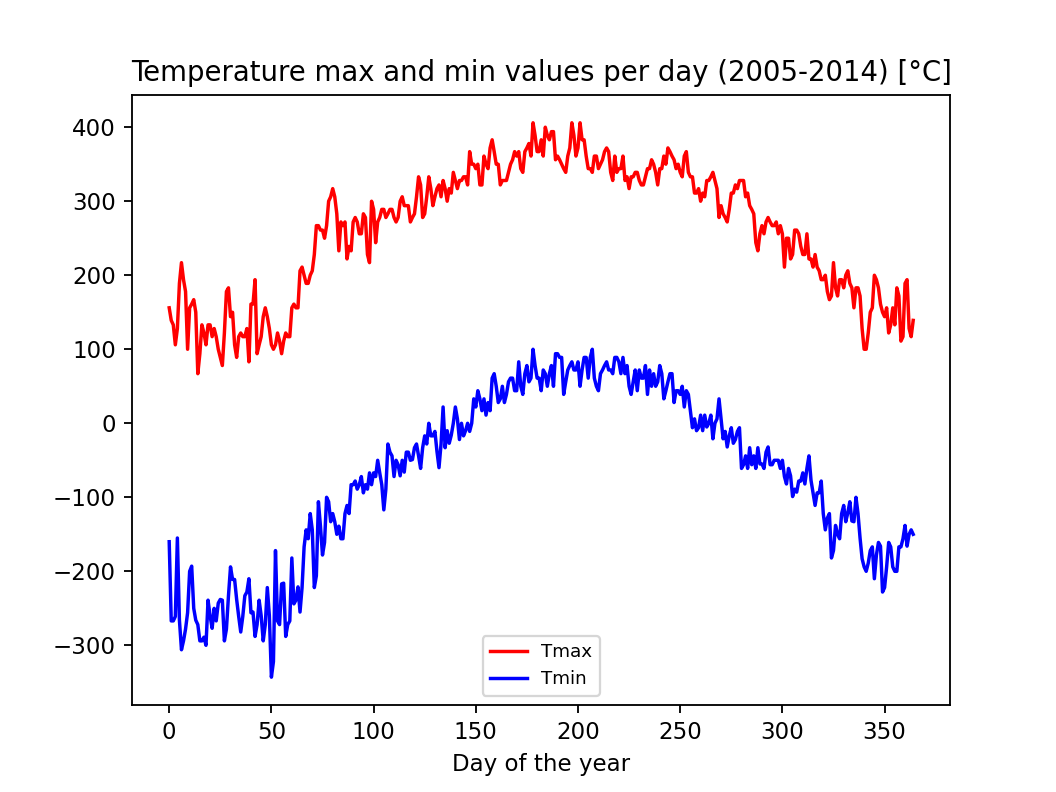

In [43]:
fig, ax = plt.subplots()
plt.plot(maxnum.values, c = 'red', label ='Tmax')
plt.plot(minnum.values, c = 'blue', label ='Tmin')

plt.xlabel('Day of the year', fontsize=10)
plt.title('Temperature max and min values per day (2005-2014) [°C]', fontsize=12)
plt.legend(loc = 8, fontsize=8)
plt.show()